# LinearRegression_ML_Problem
Business Goal
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

- Which variables are significant in predicting the price of a car ?
- How well those variables describe the price of a car ?


In [1]:
#importing libraries 

import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn import metrics
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE


In [2]:
#read csv file of Car_price
CarsP=pd.read_csv(f'..\Car _Price prediction\CarPrice.csv')
CarsP.shape

(205, 26)

In [3]:
CarsP.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [4]:
CarsP.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


@As company Name and Car Name are merged so will split them :-

In [5]:
CompanyName=CarsP['CarName'].apply(lambda x:x.split(' ')[0])
CarsP.insert(2,'CompanyName',CompanyName)

In [6]:
CarsP.head()

,car_ID,symboling,CompanyName,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,alfa-romero giulia,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,alfa-romero stelvio,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,audi 100 ls,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,audi 100ls,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
CarsP.drop(['CarName'],axis=1,inplace=True)

In [8]:
CarsP.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
CarsP['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

As seen there are some similar name of Campany like:
" vw as volkswagen"
"toyouta as toyota"
"maxda as mazda"
"porcshce as porsche"
"vokswagen as volkswagen"

In [10]:
CarsP.CompanyName = CarsP.CompanyName.str.lower()

def replace_SameName(x,y):
    CarsP.CompanyName.replace(x,y,inplace=True)

replace_SameName('vw','volkswagen')
replace_SameName('toyouta','toyota')
replace_SameName('maxda','mazda')
replace_SameName('porcshce','porsche')
replace_SameName('vokswagen','volkswagen')


In [11]:
CarsP.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [12]:
CarsP.isnull().sum()

car_ID              0
symboling           0
CompanyName         0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Categorical Variable

In [13]:
categorical_features=[feature for feature in CarsP.columns if CarsP[feature].dtypes=='O']
categorical_features

['CompanyName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

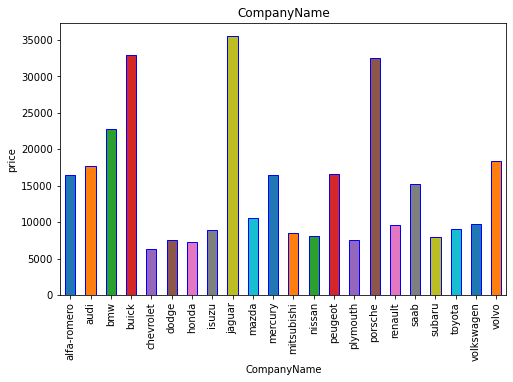

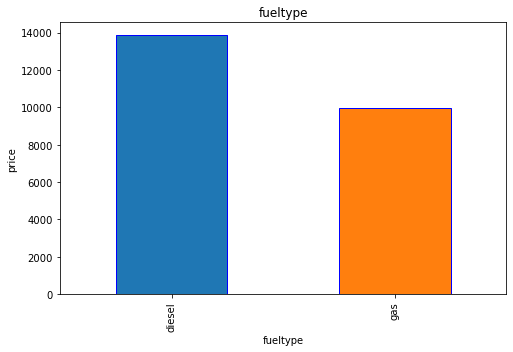

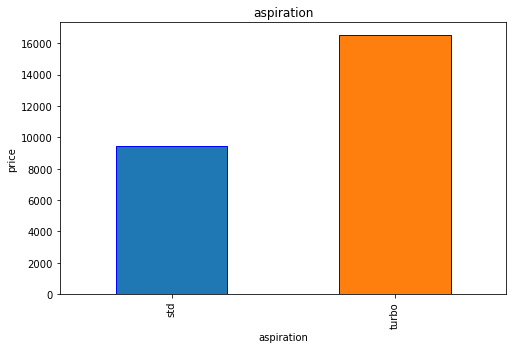

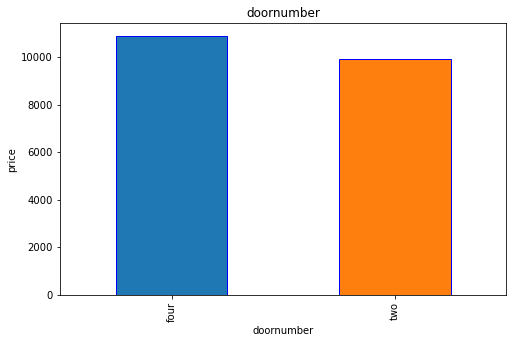

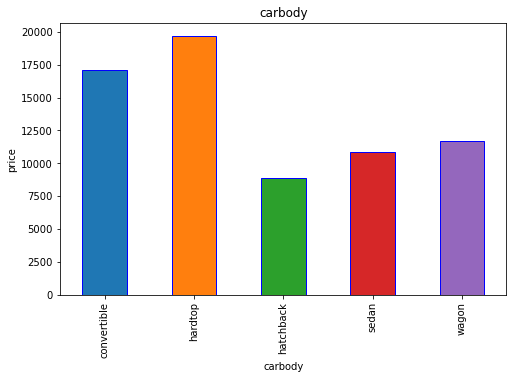

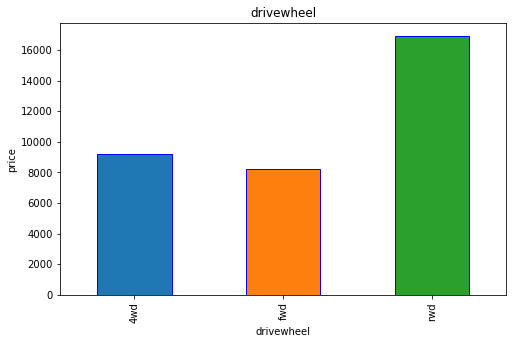

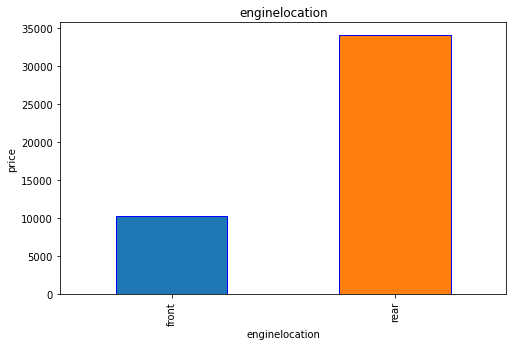

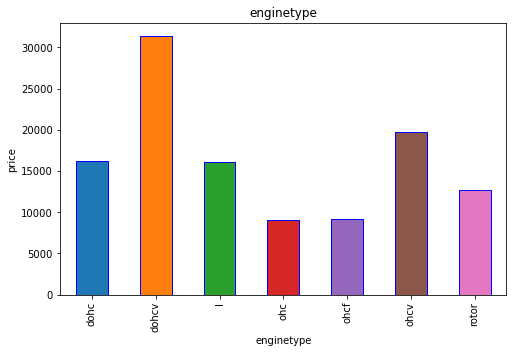

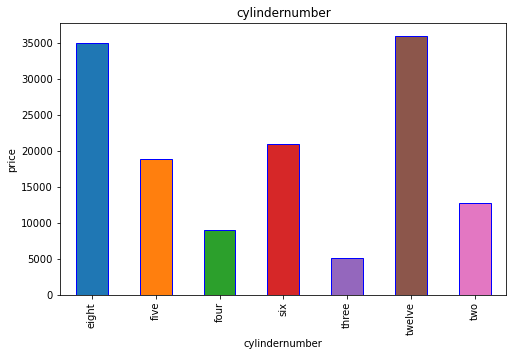

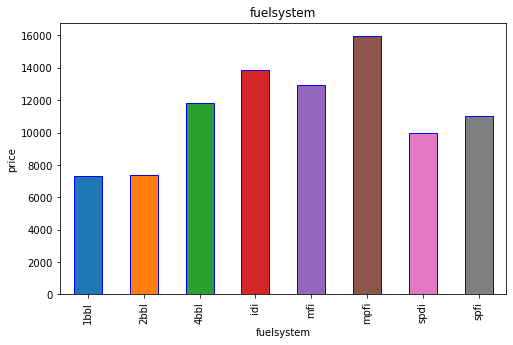

In [55]:
for feature in categorical_features:
    CarsP.groupby(feature)['price'].median().plot.bar(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
 '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'],edgecolor='blue',figsize=(8,5))
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

# Price Vs Categorical_features _inference

#The price of jaguar seems to be  higher as compare to all the company which is 35000 where as buick and porsche price seems to quite similar.
#The price of deisel is higher than that of gas.
#The price of turbo  is more than std.
#price of four doornumber is higher.
#higher price of  hardtop and convertible.
#drivewheel rwd price is higher. 
#enginelocation rear is more than front.
#enginertype of dohcv is higher than all enginetype.
#price of cylendernumber twelve is more than of others.
#fuelsystem mpfi is higher .

In [15]:
CarsP['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [16]:
CarsP.CompanyName.value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
mercury         1
Name: CompanyName, dtype: int64

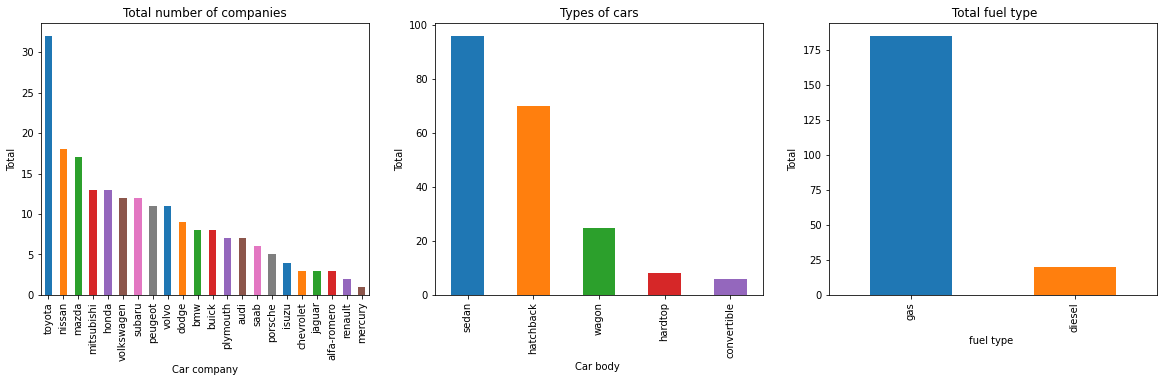

In [17]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plot_1=CarsP.CompanyName.value_counts().plot(kind='bar',color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
 '#8c564b', '#e377c2', '#7f7f7f'])
plt.title('Total number of companies')
plot_1.set(xlabel = 'Car company', ylabel='Total')

plt.subplot(1,3,2)
plot_2=CarsP.carbody.value_counts().plot(kind='bar',color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title('Types of cars')
plot_2.set(xlabel = 'Car body ', ylabel='Total')


plt.subplot(1,3,3)
plot_3 = CarsP.fueltype.value_counts().plot(kind='bar',color=['#1f77b4', '#ff7f0e'])
plt.title(' Total fuel type')
plot_3.set(xlabel = 'fuel type ', ylabel='Total')

plt.show()


#Toyota has more number of cars 
#sedan is more in numbers
#fule type gas is more in number 

# Visualising numiracal data 

C:\Users\shubham\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


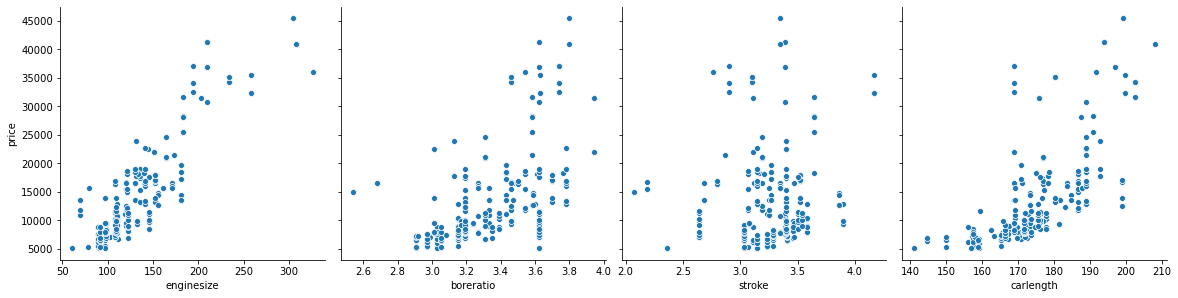

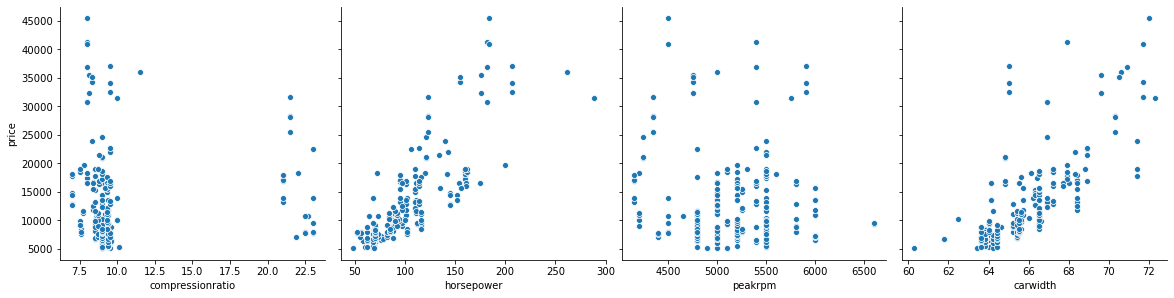

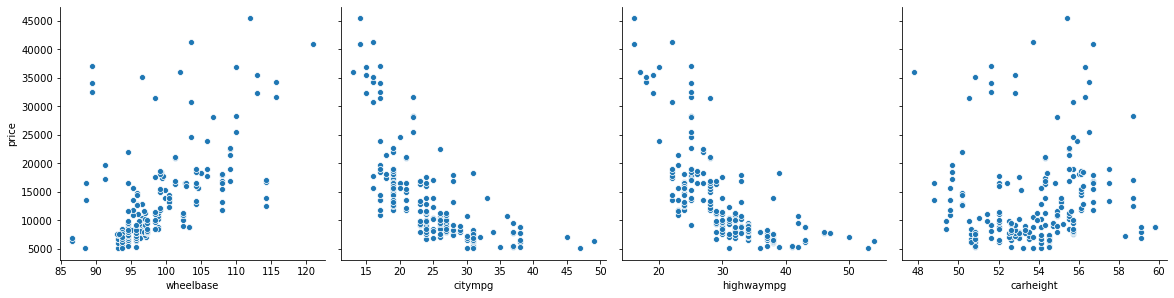

In [18]:
def pari_p(w,x,y,z):
    sns.pairplot(CarsP, x_vars=[w,x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pari_p('enginesize', 'boreratio', 'stroke', 'carlength')
pari_p('compressionratio', 'horsepower', 'peakrpm', 'carwidth')
pari_p('wheelbase', 'citympg', 'highwaympg', 'carheight')

1.carwidth , carlength,enginesize, boreratio, horsepower and wheelbase seems to have a poitive correlation with price.

2.citympg, highwaympg and carheight doesn't show any significant trend with price.

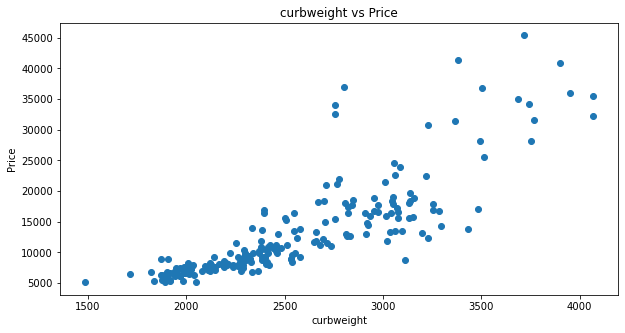

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(CarsP['curbweight'],CarsP['price'])
plt.title('curbweight vs Price')
plt.ylabel('Price')
plt.xlabel('curbweight')
plt.show()




1. curbweight seems to have a poitive correlation with price.

In [20]:
CarsEf = CarsP[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'carlength','carwidth']]
CarsEf.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,171.2,65.5
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,176.6,66.2
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,176.6,66.4


In [21]:
CarsEf.shape

(205, 14)

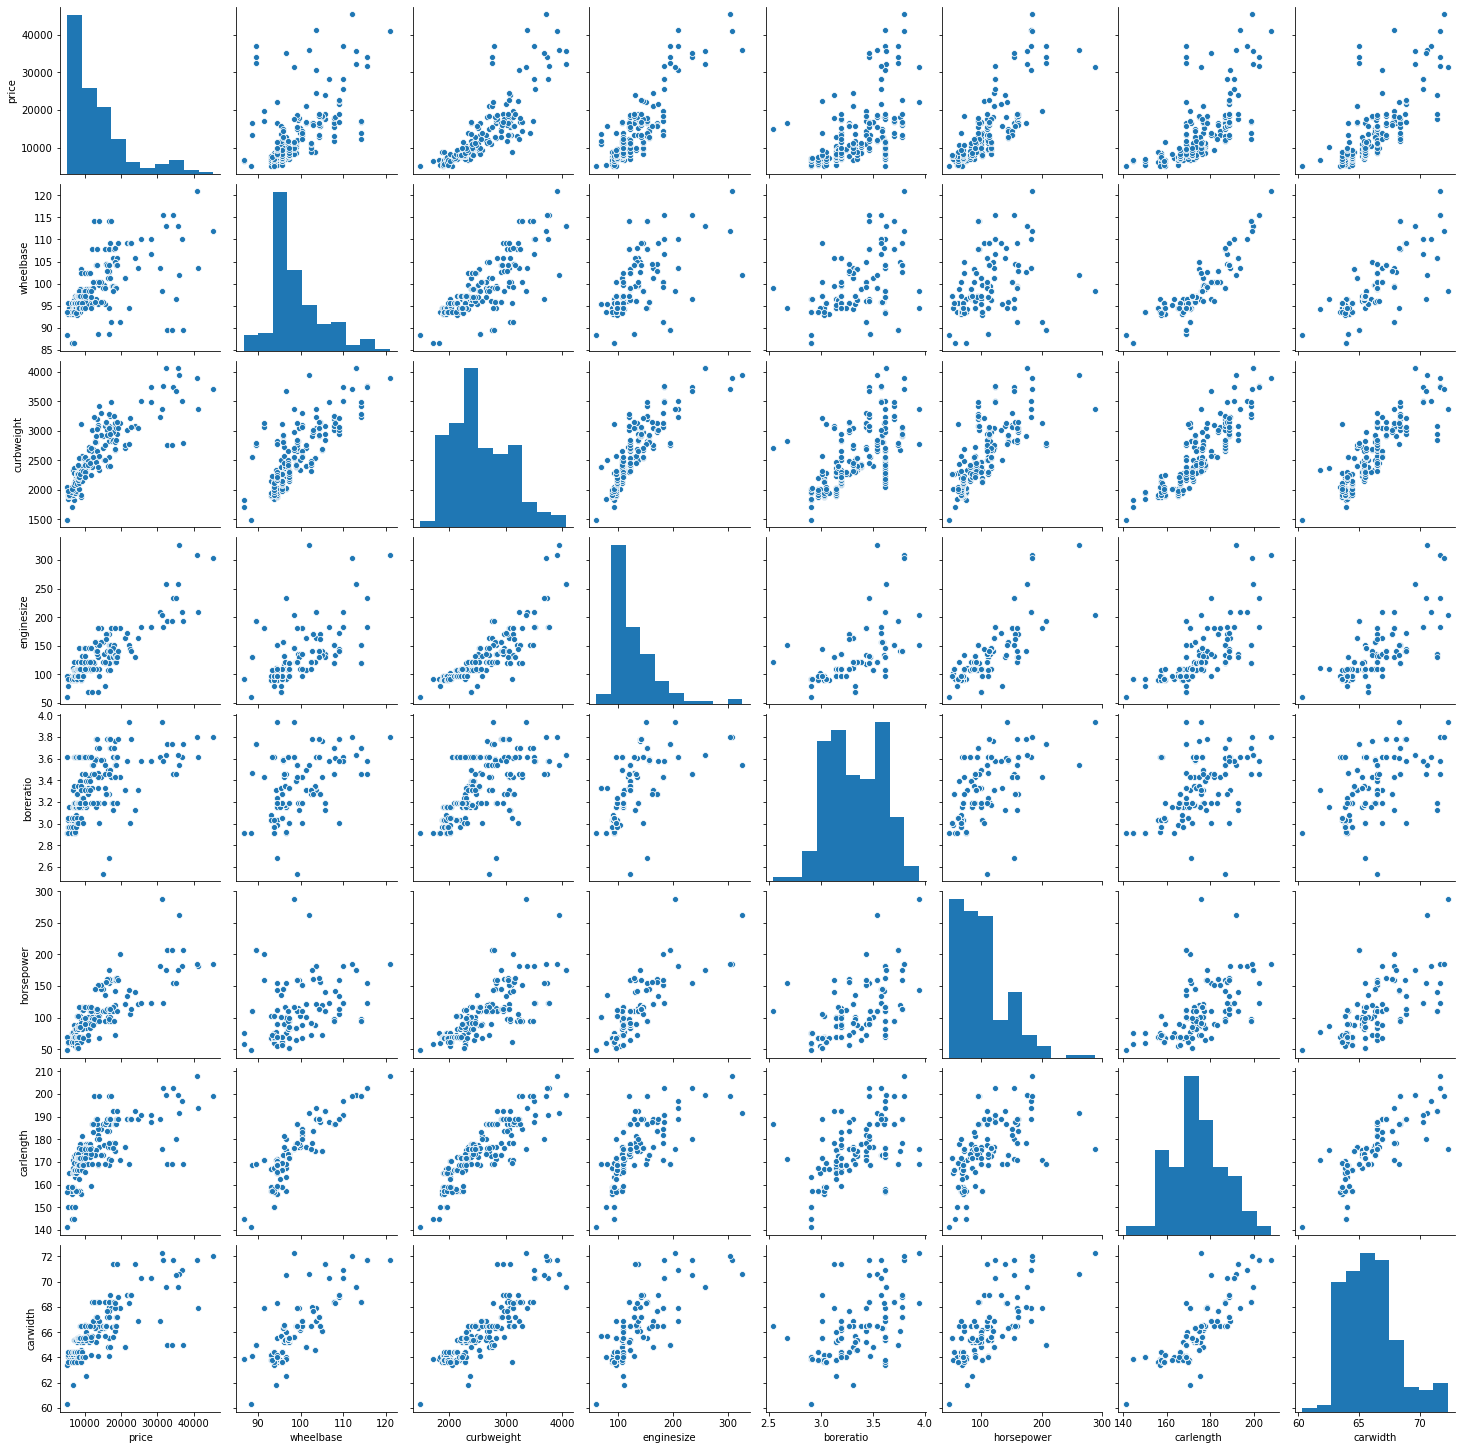

In [22]:
sns.pairplot(CarsEf)
plt.show()

In [23]:
categorical_f=[feature for feature in CarsEf.columns if CarsEf[feature].dtypes=='O']
categorical_f

['fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginetype',
 'cylindernumber']

In [24]:
dummie=pd.get_dummies(CarsEf,categorical_f)

In [25]:
pd.concat([CarsEf,dummie],axis=1)

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,...,0,0,0,0,0,1,0,0,0,0
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,...,0,0,0,0,0,1,0,0,0,0
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,...,0,1,0,0,0,0,1,0,0,0
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,...,0,0,0,0,0,1,0,0,0,0
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,gas,std,sedan,rwd,109.1,2952,ohc,four,141,...,0,0,0,0,0,1,0,0,0,0
201,19045.0,gas,turbo,sedan,rwd,109.1,3049,ohc,four,141,...,0,0,0,0,0,1,0,0,0,0
202,21485.0,gas,std,sedan,rwd,109.1,3012,ohcv,six,173,...,0,1,0,0,0,0,1,0,0,0
203,22470.0,diesel,turbo,sedan,rwd,109.1,3217,ohc,six,145,...,0,0,0,0,0,0,1,0,0,0


In [26]:
CarsD=pd.get_dummies(CarsEf, categorical_f, drop_first=True)
CarsD.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,fueltype_gas,aspiration_turbo,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495.0,88.6,2548,130,3.47,111,168.8,64.1,1,0,...,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,2548,130,3.47,111,168.8,64.1,1,0,...,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,2823,152,2.68,154,171.2,65.5,1,0,...,0,0,1,0,0,0,1,0,0,0
3,13950.0,99.8,2337,109,3.19,102,176.6,66.2,1,0,...,1,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,2824,136,3.19,115,176.6,66.4,1,0,...,1,0,0,0,1,0,0,0,0,0


In [27]:
CarsD.shape

(205, 28)

In [28]:
CarsD.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,fueltype_gas,aspiration_turbo,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,13276.710571,98.756585,2555.565854,126.907317,3.329756,104.117073,174.049268,65.907805,0.902439,0.180488,...,0.721951,0.073171,0.063415,0.019512,0.053659,0.775610,0.117073,0.004878,0.004878,0.019512
std,7988.852332,6.021776,520.680204,41.642693,0.270844,39.544167,12.337289,2.145204,0.297446,0.385535,...,0.449134,0.261054,0.244304,0.138655,0.225894,0.418201,0.322294,0.069843,0.069843,0.138655
min,5118.000000,86.600000,1488.000000,61.000000,2.540000,48.000000,141.100000,60.300000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7788.000000,94.500000,2145.000000,97.000000,3.150000,70.000000,166.300000,64.100000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,10295.000000,97.000000,2414.000000,120.000000,3.310000,95.000000,173.200000,65.500000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,16503.000000,102.400000,2935.000000,141.000000,3.580000,116.000000,183.100000,66.900000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,45400.000000,120.900000,4066.000000,326.000000,3.940000,288.000000,208.100000,72.300000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Spliting dataset for Traning & testing

In [29]:
np.random.seed(0)
CarsD_train, CarsD_test = train_test_split(CarsD, train_size = 0.8, test_size = 0.2, random_state = 100)

In [30]:
scaler = MinMaxScaler()
numerical_variable  = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
CarsD_train[numerical_variable] = scaler.fit_transform(CarsD_train[numerical_variable])

<ipython-input-30-714332cc4621>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CarsD_train[numerical_variable] = scaler.fit_transform(CarsD_train[numerical_variable])
C:\Users\shubham\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [31]:
CarsD_train.corr()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,fueltype_gas,aspiration_turbo,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
price,1.000000,0.569241,0.845345,0.863011,0.544209,0.812608,0.684234,0.762071,-0.122847,0.197039,...,-0.338174,0.000158,0.329509,0.005339,0.272994,-0.709920,0.531981,-0.077734,0.237376,0.005339
wheelbase,0.569241,1.000000,0.779234,0.561150,0.452273,0.348174,0.869983,0.783199,-0.324834,0.261816,...,-0.207413,-0.152147,0.112863,-0.083903,0.306522,-0.356993,0.249452,-0.136103,0.050235,-0.083903
curbweight,0.845345,0.779234,1.000000,0.864155,0.631190,0.752908,0.876835,0.859037,-0.223380,0.326274,...,-0.423870,-0.069054,0.370921,-0.031709,0.284642,-0.600283,0.456958,-0.154770,0.216063,-0.031709
enginesize,0.863011,0.561150,0.864155,1.000000,0.574091,0.823096,0.691094,0.729659,-0.084692,0.122813,...,-0.360162,-0.024503,0.496673,-0.205612,0.164676,-0.617968,0.572318,-0.124746,0.402737,-0.205612
boreratio,0.544209,0.452273,0.631190,0.574091,1.000000,0.551212,0.603726,0.548982,-0.069082,0.186848,...,-0.481180,0.390712,0.079816,0.020137,-0.002366,-0.165633,0.147854,-0.118455,0.074191,0.020137
horsepower,0.812608,0.348174,0.752908,0.823096,0.551212,1.000000,0.546998,0.651416,0.163034,0.221602,...,-0.455438,0.035870,0.419297,0.034051,0.138645,-0.662090,0.552725,-0.105883,0.321251,0.034051
carlength,0.684234,0.869983,0.876835,0.691094,0.603726,0.546998,1.000000,0.836833,-0.224407,0.227776,...,-0.286849,-0.080383,0.210632,-0.053152,0.302931,-0.440270,0.336322,-0.206659,0.120388,-0.053152
carwidth,0.762071,0.783199,0.859037,0.729659,0.548982,0.651416,0.836833,1.000000,-0.237242,0.299634,...,-0.287400,-0.096828,0.300791,-0.004164,0.431178,-0.550022,0.258465,-0.198500,0.176185,-0.004164
fueltype_gas,-0.122847,-0.324834,-0.223380,-0.084692,-0.069082,0.163034,-0.224407,-0.237242,1.000000,-0.377330,...,-0.034211,0.099781,0.081945,0.053769,-0.164139,-0.002006,0.065604,0.026636,0.026636,0.053769
aspiration_turbo,0.197039,0.261816,0.326274,0.122813,0.186848,0.221602,0.227776,0.299634,-0.377330,1.000000,...,-0.041351,-0.013167,-0.038181,-0.071743,0.222990,-0.012997,-0.070056,-0.035540,-0.035540,-0.071743


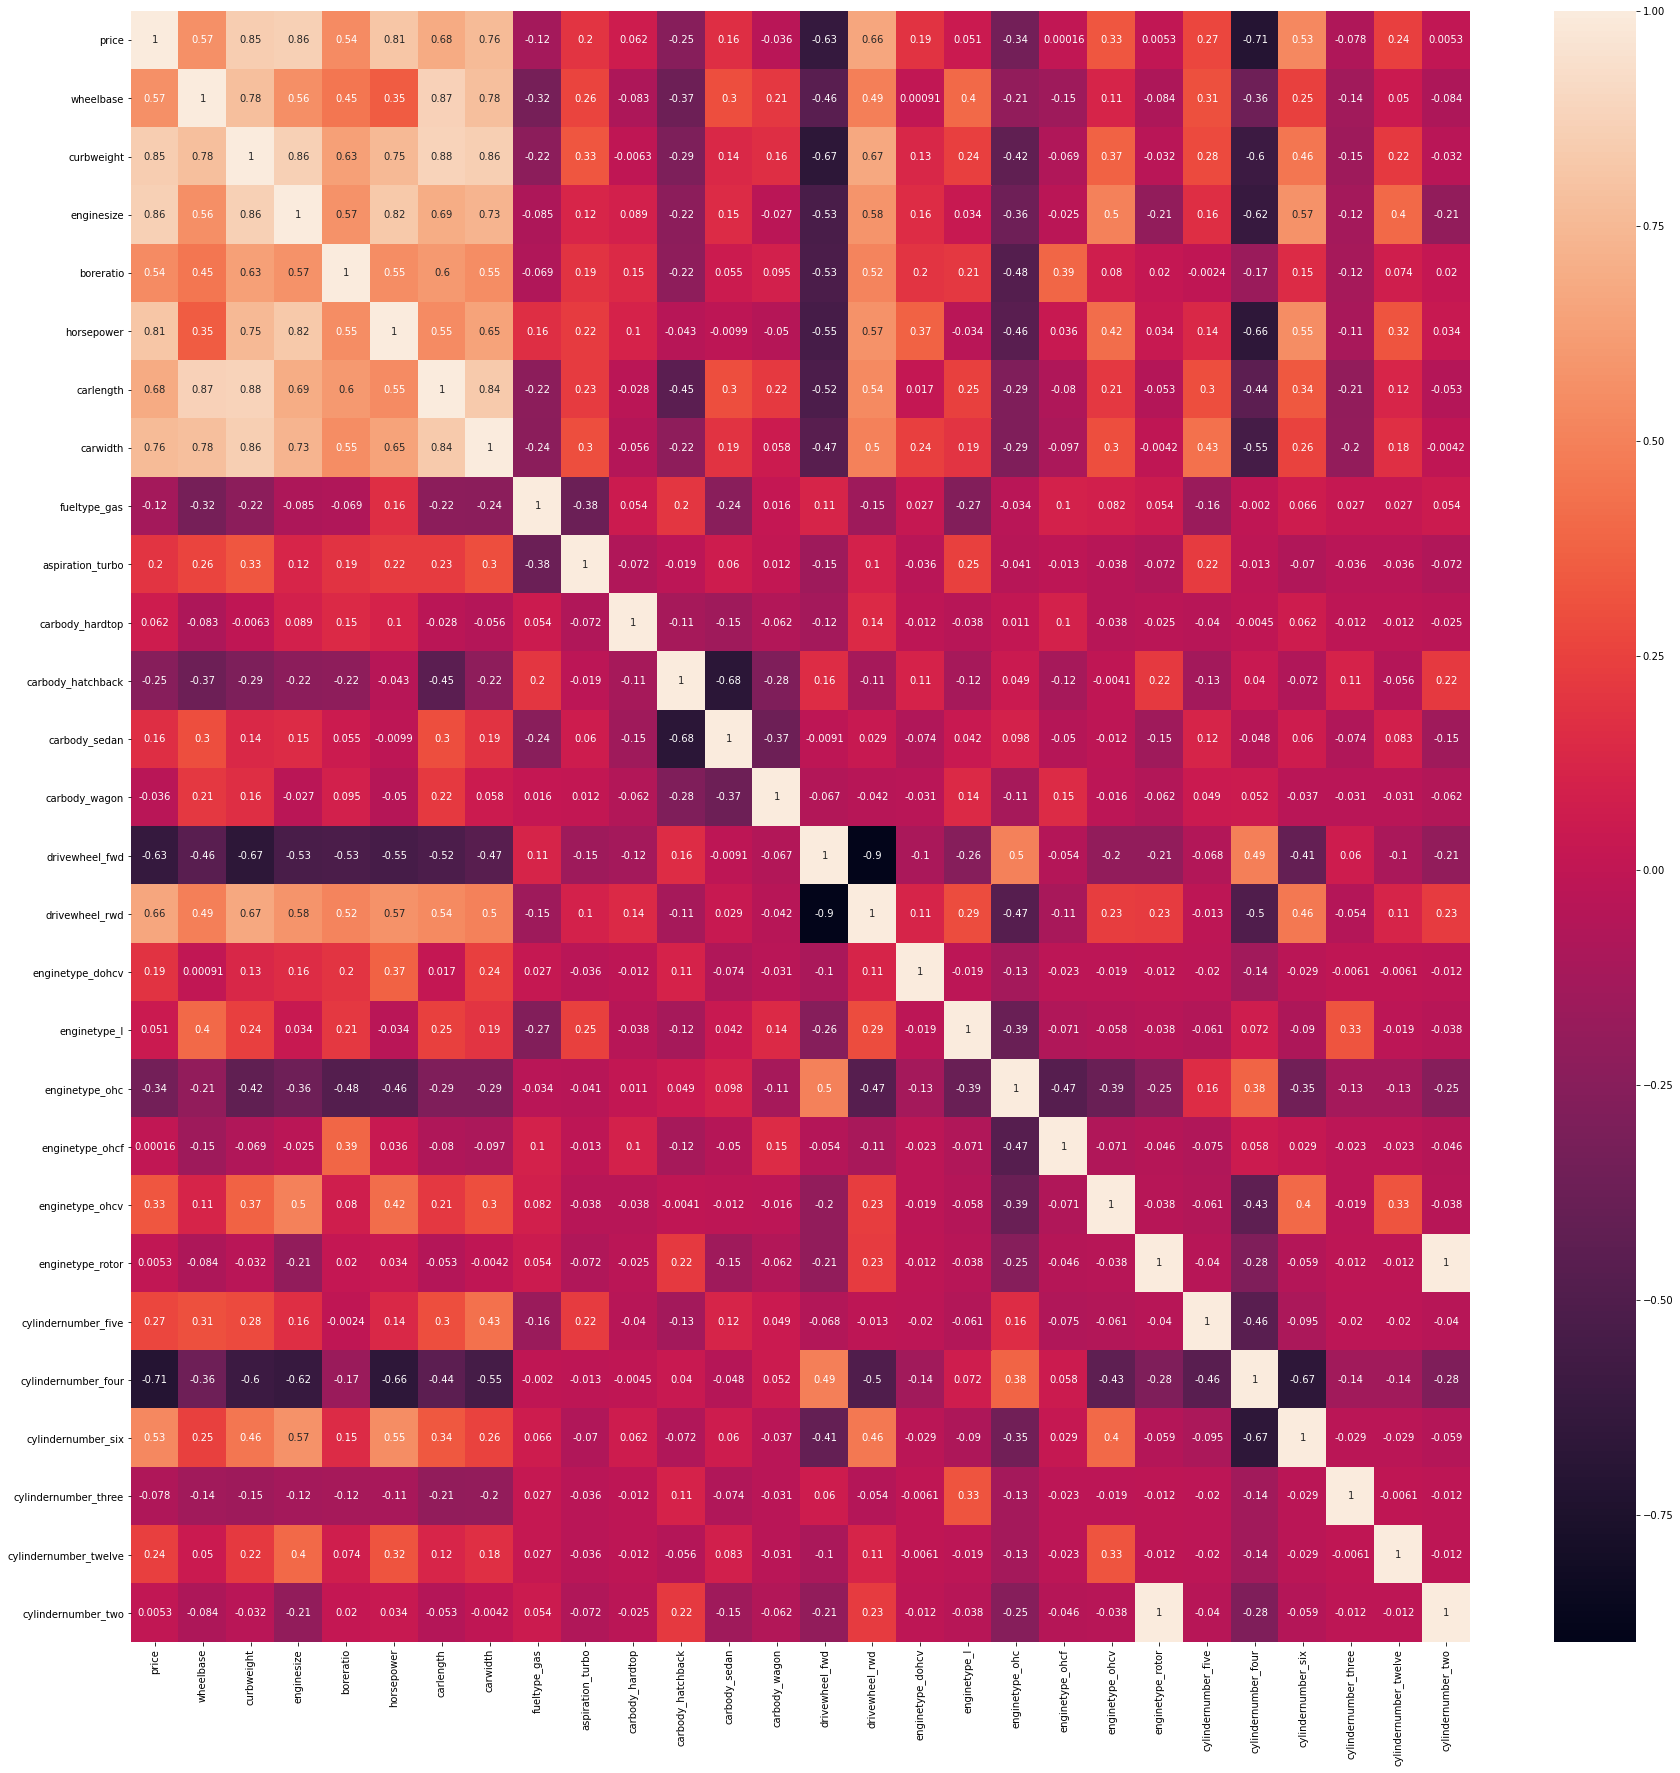

In [32]:
plt.figure(figsize=(30,30))
sns.heatmap(CarsD_train.corr(),annot=True,fmt = '.2g')
plt.show()


Highly correlated variables to price are - curbweight, enginesize, horsepower,carwidth 

In [33]:
y_train = CarsD_train.pop('price')
X_train = CarsD_train

# Model Building

In [34]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

C:\Users\shubham\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [35]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 12),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 9),
 ('horsepower', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('fueltype_gas', False, 16),
 ('aspiration_turbo', False, 17),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 18),
 ('drivewheel_rwd', False, 10),
 ('enginetype_dohcv', False, 3),
 ('enginetype_l', False, 11),
 ('enginetype_ohc', False, 5),
 ('enginetype_ohcf', False, 6),
 ('enginetype_ohcv', True, 1),
 ('enginetype_rotor', False, 13),
 ('cylindernumber_five', False, 4),
 ('cylindernumber_four', False, 2),
 ('cylindernumber_six', False, 8),
 ('cylindernumber_three', False, 15),
 ('cylindernumber_twelve', False, 7),
 ('cylindernumber_two', False, 14)]

In [36]:
X_train.columns[rfe.support_]

Index(['curbweight', 'enginesize', 'horsepower', 'carlength', 'carwidth',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_ohcv'],
      dtype='object')

In [37]:
x_train_rfe = X_train[X_train.columns[rfe.support_]]
x_train_rfe.head()

,curbweight,enginesize,horsepower,carlength,carwidth,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_ohcv
3,0.329325,0.181132,0.225000,0.577236,0.491667,0,0,1,0,0
157,0.240884,0.139623,0.091667,0.409756,0.341667,0,1,0,0,0
81,0.325834,0.230189,0.166667,0.518699,0.425000,0,1,0,0,0
32,0.135376,0.067925,0.050000,0.144715,0.308333,0,1,0,0,0
99,0.324282,0.222642,0.204167,0.525203,0.408333,0,1,0,0,0


Building model using statsmodel, for the detailed statistics

In [38]:
x_train_rfe=sm.add_constant(x_train_rfe)

In [39]:
model= sm.OLS(y_train,x_train_rfe).fit()

In [40]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     84.79
Date:                Sat, 17 Oct 2020   Prob (F-statistic):           3.35e-57
Time:                        23:34:05   Log-Likelihood:                 175.82
No. Observations:                 164   AIC:                            -329.6
Df Residuals:                     153   BIC:                            -295.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0044      0.043      0.101      0.919      -0.080       0.089
curbweight            0.3621      0.119      3.045      0.003       0.127       0.597
enginesize            0.4540      0.118      3.854      0.000       0.221       0.687
horsepower            0.3428      0.078      4.371      0.000       0.188       0.498
carlength            -0.1789      0.095     -1.889      0.061      -0.366       0.008
carwidth              0.2554      0.082      3.101      0.002       0.093       0.418
carbody_hardtop      -0.1226      0.059     -2.084      0.039      -0.239      -0.006
carbody_hatchback    -0.1667      0.042     -3.989      0.000      -0.249      -0.084
carbody_sedan        -0.1199      0.043     -2.806      0.006      -0.204      -0.035
carbody_wagon        -0.1641      0.047     -3.527      0.001      -0.256      -0.072
enginetype_ohcv      -0.1024      0.035     -2.919      0.004      -0.172      -0.033
==============================================================================
Omnibus:                       36.013   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.741
Skew:                           0.940   Prob(JB):                     1.08e-18
Kurtosis:                       5.928   Cond. No.                         33.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p-vale of "carlength" seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [41]:
model=x_train_rfe.drop(['carlength'],axis=1)

In [42]:
model= sm.OLS(y_train, x_train_rfe).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     84.79
Date:                Sat, 17 Oct 2020   Prob (F-statistic):           3.35e-57
Time:                        23:34:05   Log-Likelihood:                 175.82
No. Observations:                 164   AIC:                            -329.6
Df Residuals:                     153   BIC:                            -295.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0044      0.043      0.101      0.919      -0.080       0.089
curbweight            0.3621      0.119      3.045      0.003       0.127       0.597
enginesize            0.4540      0.118      3.854      0.000       0.221       0.687
horsepower            0.3428      0.078      4.371      0.000       0.188       0.498
carlength            -0.1789      0.095     -1.889      0.061      -0.366       0.008
carwidth              0.2554      0.082      3.101      0.002       0.093       0.418
carbody_hardtop      -0.1226      0.059     -2.084      0.039      -0.239      -0.006
carbody_hatchback    -0.1667      0.042     -3.989      0.000      -0.249      -0.084
carbody_sedan        -0.1199      0.043     -2.806      0.006      -0.204      -0.035
carbody_wagon        -0.1641      0.047     -3.527      0.001      -0.256      -0.072
enginetype_ohcv      -0.1024      0.035     -2.919      0.004      -0.172      -0.033
==============================================================================
Omnibus:                       36.013   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.741
Skew:                           0.940   Prob(JB):                     1.08e-18
Kurtosis:                       5.928   Cond. No.                         33.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
lm = sm.OLS(y_train,x_train_rfe).fit()
y_train_price = lm.predict(x_train_rfe)

Text(0.5, 0, 'Errors')

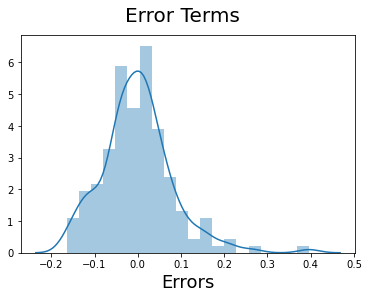

In [44]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)              
plt.xlabel('Errors', fontsize = 18)   

In [45]:
numerical_variable = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
CarsD_test[numerical_variable] = scaler.fit_transform(CarsD_test[numerical_variable])

<ipython-input-45-57aabf7aad4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CarsD_test[numerical_variable] = scaler.fit_transform(CarsD_test[numerical_variable])
C:\Users\shubham\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [46]:
y_test = CarsD_test.pop('price')
x_test = CarsD_test

In [47]:
x_train_rfe = x_train_rfe.drop('const',axis=1)
x_test_rfe = x_test[x_train_rfe.columns]
x_test_rfe = sm.add_constant(x_test_rfe)

In [49]:
y_pred = lm.predict(x_test_rfe)
r2_score(y_test, y_pred)

0.7535447509634338

Text(0, 0.5, 'y_pred')

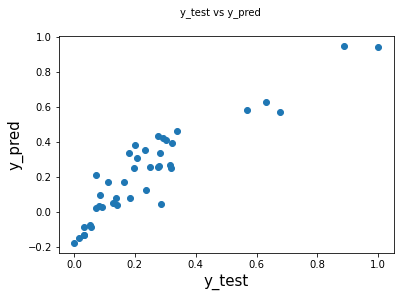

In [54]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=10)             
plt.xlabel('y_test', fontsize=15)              
plt.ylabel('y_pred', fontsize=15 ) 